# Lab 4: Baseline Machine Learning Models  
**Name:** Gurmandeep Deol  
**Date:** 10-06-2025  
**Course:** SRT521 - Advanced Data Analysis for Security  
**Week:** 4 of 14  
**Instructor:** Hamed Haddadpajouh, PhD  
**Lab Duration:** 2 hours

## Learning Objectives
By the end of this lab, you will be able to:
- Implement both supervised and unsupervised machine learning algorithms
- Train and evaluate baseline models on security datasets
- Perform clustering analysis and visualization
- Split data appropriately for training and testing
- Compare model performance with comprehensive evaluation metrics
- Visualize results and interpret model performance

## Prerequisites
- Completed Labs 1-3 (EDA, data cleaning, feature engineering)
- Basic understanding of machine learning concepts
- Python libraries for ML (scikit-learn, xgboost, matplotlib, seaborn)

## What You'll Accomplish
1. **Supervised Learning**: Train Random Forest, XGBoost, Logistic Regression, and SVM models
2. **Unsupervised Learning**: Perform K-means and DBSCAN clustering
3. **Data Splitting**: Implement 80-20 train-test split for datasets without predefined splits
4. **Visualization**: Create comprehensive plots for model performance and clusters
5. **Evaluation**: Calculate and visualize accuracy and other performance metrics

## Machine Learning Algorithms Overview

### Supervised Learning Algorithms

#### 1. Random Forest
- **Type**: Ensemble learning (bagging)
- **How it works**: Combines multiple decision trees, each trained on different subsets of data
- **Advantages**: Handles overfitting well, provides feature importance, works with mixed data types
- **Best for**: General-purpose classification, feature selection, interpretable models
- **References**:
  - [Scikit-learn Random Forest Documentation](https://scikit-learn.org/stable/modules/ensemble.html#forest)
  - [Random Forest Tutorial - Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
  - [Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.](https://link.springer.com/article/10.1023/A:1010933404324)

#### 2. XGBoost (Extreme Gradient Boosting)
- **Type**: Gradient boosting ensemble
- **How it works**: Sequentially builds models that correct previous models' errors
- **Advantages**: High performance, handles missing values, fast training
- **Best for**: Competitions, high-performance requirements, structured data
- **References**:
  - [XGBoost Documentation](https://xgboost.readthedocs.io/)
  - [XGBoost Tutorial - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
  - [Chen, T., & Guestrin, C. (2016). Xgboost: A scalable tree boosting system. KDD 2016.](https://dl.acm.org/doi/10.1145/2939672.2939785)

#### 3. Logistic Regression
- **Type**: Linear model
- **How it works**: Uses logistic function to model probability of class membership
- **Advantages**: Simple, interpretable, fast, good baseline
- **Best for**: Binary classification, interpretable models, baseline comparisons
- **References**:
  - [Scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
  - [Logistic Regression Tutorial - Machine Learning Mastery](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
  - [Hosmer Jr, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). Applied logistic regression. John Wiley & Sons.](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118548387)

#### 4. Support Vector Machine (SVM)
- **Type**: Maximum margin classifier
- **How it works**: Finds optimal hyperplane that separates classes with maximum margin
- **Advantages**: Effective in high dimensions, memory efficient, versatile kernels
- **Best for**: High-dimensional data, non-linear patterns, small to medium datasets
- **References**:
  - [Scikit-learn SVM Documentation](https://scikit-learn.org/stable/modules/svm.html)
  - [SVM Tutorial - MIT](https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)
  - [Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine learning, 20(3), 273-297.](https://link.springer.com/article/10.1007/BF00994018)

### Unsupervised Learning Algorithms

#### 1. K-Means Clustering
- **Type**: Partitional clustering
- **How it works**: Divides data into k clusters by minimizing within-cluster sum of squares
- **Advantages**: Simple, fast, works well with spherical clusters
- **Best for**: Data exploration, customer segmentation, image compression
- **References**:
  - [Scikit-learn K-Means Documentation](https://scikit-learn.org/stable/modules/clustering.html#k-means)
  - [K-Means Tutorial - Stanford CS229](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)
  - [MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations.](https://projecteuclid.org/euclid.bsmsp/1200512992)

#### 2. DBSCAN (Density-Based Spatial Clustering)
- **Type**: Density-based clustering
- **How it works**: Groups points that are closely packed together, marks outliers as noise
- **Advantages**: Finds clusters of arbitrary shapes, identifies outliers, doesn't require k parameter
- **Best for**: Anomaly detection, irregular cluster shapes, noisy data
- **References**:
  - [Scikit-learn DBSCAN Documentation](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
  - [DBSCAN Tutorial - Towards Data Science](https://towardsdatascience.com/dbscan-clustering-explained-97556a2f556b)
  - [Ester, M., et al. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. KDD 1996.](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

---


# Part 1: Setup and Data Loading 📚

In this lab, you'll work with both supervised and unsupervised machine learning algorithms. Let's start by setting up our environment and loading the data.

## 1.1 Import Required Libraries

First, let's import all the libraries we'll need for this lab.


**TODO: Run this cell to import all necessary libraries**


In [1]:
# Import required libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
import xgboost as xgb

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)

print("All libraries imported successfully!")
print("Ready to start machine learning analysis!")


All libraries imported successfully!
Ready to start machine learning analysis!


## 1.2 Data Loading and Initial Exploration

Now let's load your dataset from the previous lab (Week 3 - Feature Engineering). You should use the engineered dataset you created in Lab 3.

### Available Datasets:
- **fraud_large.csv** - Credit card fraud detection
- **phishing_large.csv** - Phishing URL detection  
- **ton_iot_large.csv** - IoT intrusion detection
- **sorel_large.csv** - Malware detection

**TODO: Choose your dataset and update the DATASET_FILE variable below**


In [3]:
# Set up data paths
REPO_ROOT = Path.cwd().parents[2] if len(Path.cwd().parents) >= 2 else Path.cwd()
DATA_DIR = REPO_ROOT / ''


DATASET_FILE = 'engineered_dataset4.csv'
DATA_PATH = DATA_DIR / DATASET_FILE

print(f"Data directory: {DATA_DIR}")
print(f"Selected dataset: {DATASET_FILE}")
print(f"Full path: {DATA_PATH}")

# Check if file exists
if DATA_PATH.exists():
    print("Dataset file found!")
else:
    print("Dataset file not found. Please check the path.")
    # List available files
    if DATA_DIR.exists():
        print("Available files:")
        for file in DATA_DIR.glob("*.csv"):
            print(f"  - {file.name}")
    else:
        print(f"Data directory {DATA_DIR} does not exist.")


Data directory: /content
Selected dataset: engineered_dataset4.csv
Full path: /content/engineered_dataset4.csv
Dataset file found!


In [16]:
# Load the dataset
print("Loading dataset...")
data = pd.read_csv(DATA_PATH)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
print(f"Features: {data.shape[1]}")
print(f"Samples: {data.shape[0]}")

# Display first few rows
print("\nFirst 5 rows:")
display(data.head())

# Display basic info
print("\nDataset Info:")
print(f"Columns: {list(data.columns)}")
print(f"Data types: {data.dtypes.value_counts().to_dict()}")
print(f"Missing values: {data.isnull().sum().sum()}")

# Display target column information if exists
# Common target column names in security datasets
target_candidates = ['class', 'label', 'target', 'is_fraud', 'attack_type', 'malware_family']
target_col = None

for col in target_candidates:
    if col in data.columns:
        target_col = col
        break

if target_col:
    print(f"\nTarget column found: '{target_col}'")
    print(f"Target distribution:")
    print(data[target_col].value_counts())
else:
    print("\nNo standard target column found. You may need to specify it manually.")
    print("Available columns:", data.columns.tolist())


Loading dataset...
Dataset loaded successfully!
Dataset shape: (235795, 68)
Features: 68
Samples: 235795

First 5 rows:


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,Title,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,URL_Complexity_Score,Domain_Trust_Score,Content_Quality_Score,Suspicious_Elements_Count,Financial_Keywords,Security_Risk_Score,External_Dependency_Ratio,Empty_Links_Ratio,URL_Domain_Length_Ratio,Content_URL_Ratio,Title_Match_Diff,Tech_Sophistication
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,3,1,0,0,0.0,18,0.581,0,0.0,0,0,0,1,0.032,1,558,9381,1,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...,0.000000,0.000000,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,34,20,28,119,0,124,1,10.580,60.916284,17,2,1,13,0.510288,0.000000,1.240000,17.437500,0.0,38.0
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,2,1,0,0,0.0,9,0.391,0,0.0,0,0,0,2,0.087,1,618,9381,1,johannes gutenberg-universitÃ¤t mainz,55.555556,55.555556,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,50,9,8,39,0,217,1,12.605,52.417123,16,0,0,0,0.847656,0.000000,1.352941,25.750000,0.0,17.1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,2,2,0,0,0.0,15,0.517,0,0.0,0,0,0,2,0.069,1,467,682,1,voice fm southampton,46.666667,46.666667,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,10,2,7,42,2,5,1,17.935,50.475533,23,1,0,5,0.106383,0.040816,1.260870,15.566667,0.0,11.9
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,3,1,0,0,0.0,13,0.500,0,0.0,0,0,0,1,0.038,1,6356,26824,1,home page: seminars in fetal and neonatal medi...,0.000000,0.000000,0,1,1,0,0,0,1,12,0,1,1,1,0,0,1,1,1,3,27,15,22,1,31,1,10.170,60.916284,20,14,2,21,0.584906,0.018519,1.300000,235.407407,0.0,29.3
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,3,1,0,0,0.0,20,0.606,0,0.0,0,0,0,1,0.030,1,6089,28404,1,fundaciÃ³n rewilding argentina,100.000000,100.000000,0,1,1,1,1,1,0,2,0,1,1,1,0,1,1,0,1,244,15,34,72,1,85,1,10.750,63.198512,26,5,2,21,0.541401,0.006329,1.222222,179.088235,0.0,60.7



Dataset Info:
Columns: ['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label', 'URL_Complexity_Score', 'Domain_Trust_Score', 'Content_Qu

# Part 2: Data Preparation and Splitting 🔄

## 2.1 Data Splitting (80-20 Train-Test Split)

Since most datasets don't come with predefined train-test splits, we'll create our own using the standard 80-20 split.

**TODO: Update the TARGET_COLUMN variable with your dataset's target column name**


In [29]:
TARGET_COLUMN = 'label'

# Verify target column exists
if TARGET_COLUMN not in data.columns:
    print(f"Target column '{TARGET_COLUMN}' not found!")
    print("Available columns:", data.columns.tolist())
    print("Please update TARGET_COLUMN variable above.")
else:
    print(f"Target column '{TARGET_COLUMN}' found!")

    # Remove identifier and text columns that shouldn't be features
    columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']
    print(f"\nRemoving non-feature columns: {columns_to_drop}")

    # Prepare features and target
    X = data.drop(columns=[TARGET_COLUMN] + columns_to_drop)
    y = data[TARGET_COLUMN]

    print(f"Features shape after cleanup: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target classes: {y.nunique()}")
    print(f"Target distribution:")
    print(y.value_counts(normalize=True).round(4))


Target column 'label' found!

Removing non-feature columns: ['FILENAME', 'URL', 'Domain', 'Title']
Features shape after cleanup: (235795, 63)
Target shape: (235795,)
Target classes: 2
Target distribution:
label
1    0.5719
0    0.4281
Name: proportion, dtype: float64


In [30]:
# Handle non-numeric features
print("Preprocessing features...")

# Identify numeric and non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numeric columns: {len(numeric_columns)}")
print(f"Non-numeric columns: {len(non_numeric_columns)}")

if non_numeric_columns:
    print("Non-numeric columns found:", non_numeric_columns)
    print("Converting to numeric using Label Encoding...")

    # Apply label encoding to non-numeric columns
    label_encoders = {}
    X_processed = X.copy()

    for col in non_numeric_columns:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        label_encoders[col] = le

    print("Label encoding completed!")
else:
    X_processed = X.copy()
    print("All columns are already numeric!")

# Handle missing values
if X_processed.isnull().sum().sum() > 0:
    print("Handling missing values...")
    X_processed = X_processed.fillna(X_processed.median())
    print("Missing values filled with median!")

print(f"Final feature matrix shape: {X_processed.shape}")
print(f"Data preprocessing completed!")


Preprocessing features...
Numeric columns: 62
Non-numeric columns: 1
Non-numeric columns found: ['TLD']
Converting to numeric using Label Encoding...
Label encoding completed!
Final feature matrix shape: (235795, 63)
Data preprocessing completed!


In [31]:
# Perform 80-20 train-test split
print("Performing 80-20 train-test split...")

# For classification, use stratified split to maintain class distribution
if y.nunique() <= 20:  # Reasonable number of classes for stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )
    print("Stratified split performed (maintains class distribution)")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y,
        test_size=0.2,
        random_state=42
    )
    print("Random split performed (too many classes for stratification)")

# Display split information
print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(data)*100:.1f}%)")

# Show class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True).round(4))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True).round(4))

print("\nData splitting completed successfully!")


Performing 80-20 train-test split...
Stratified split performed (maintains class distribution)

Training set: 188636 samples (80.0%)
Testing set: 47159 samples (20.0%)

Class distribution in training set:
label
1    0.5719
0    0.4281
Name: proportion, dtype: float64

Class distribution in testing set:
label
1    0.5719
0    0.4281
Name: proportion, dtype: float64

Data splitting completed successfully!


# Part 3: Supervised Learning Models

In this section, we'll train and evaluate multiple supervised learning algorithms:
1. **Random Forest** - Ensemble of decision trees
2. **XGBoost** - Gradient boosting algorithm
3. **Logistic Regression** - Linear classification model
4. **Support Vector Machine (SVM)** - Maximum margin classifier

## 3.1 Algorithm Explanations

### Random Forest Algorithm
**Concept**: Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree is trained on a different subset of the data (bootstrap sampling) and uses a random subset of features for each split.

**Key Parameters**:
- `n_estimators`: Number of trees in the forest (more trees = better performance but slower)
- `max_depth`: Maximum depth of trees (prevents overfitting)
- `min_samples_split`: Minimum samples required to split a node
- `random_state`: Ensures reproducible results

**Why it works well for security data**:
- Handles mixed data types (numerical and categorical)
- Robust to outliers and missing values
- Provides feature importance scores
- Reduces overfitting through ensemble averaging

**Tutorial Resources**:
- [Random Forest in Python - DataCamp](https://www.datacamp.com/tutorial/random-forests-classifier-python)
- [Understanding Random Forest - Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

### XGBoost Algorithm
**Concept**: XGBoost (Extreme Gradient Boosting) is a gradient boosting framework that builds models sequentially, where each new model corrects the errors of the previous ones.

**Key Parameters**:
- `n_estimators`: Number of boosting rounds
- `max_depth`: Maximum depth of trees
- `learning_rate`: Step size shrinkage to prevent overfitting
- `eval_metric`: Evaluation metric for validation

**Why it's powerful**:
- Often wins machine learning competitions
- Handles missing values automatically
- Built-in regularization to prevent overfitting
- Parallel processing for faster training

**Tutorial Resources**:
- [XGBoost Python Tutorial - Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
- [XGBoost Documentation](https://xgboost.readthedocs.io/)

### Logistic Regression Algorithm
**Concept**: Logistic Regression uses the logistic function to model the probability of class membership. It's a linear model that works by finding the best line (or hyperplane) to separate classes.

**Key Parameters**:
- `max_iter`: Maximum number of iterations for convergence
- `random_state`: Ensures reproducible results
- `C`: Inverse of regularization strength (smaller = stronger regularization)

**Why it's useful**:
- Simple and interpretable
- Fast training and prediction
- Good baseline for comparison
- Provides probability estimates

**Tutorial Resources**:
- [Logistic Regression Tutorial - Machine Learning Mastery](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
- [Logistic Regression in Python - Real Python](https://realpython.com/logistic-regression-python/)

### Support Vector Machine (SVM) Algorithm
**Concept**: SVM finds the optimal hyperplane that separates classes with the maximum margin. It can handle non-linear relationships using kernel functions.

**Key Parameters**:
- `kernel`: Type of kernel function ('rbf', 'linear', 'poly')
- `C`: Regularization parameter
- `probability`: Whether to enable probability estimates

**Why it's effective**:
- Works well with high-dimensional data
- Memory efficient
- Versatile with different kernel functions
- Good for small to medium datasets

**Tutorial Resources**:
- [SVM Tutorial - MIT](https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf)
- [Support Vector Machines - Scikit-learn](https://scikit-learn.org/stable/modules/svm.html)

## 3.2 Model Training and Evaluation

**TODO: Run the following cells to train all models and compare their performance**


In [32]:
# Initialize models dictionary to store results
models = {}
results = {}

print("Initializing supervised learning models...")

# 1. Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model
print("Random Forest training completed!")

# 2. XGBoost
print("\nTraining XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model
print("XGBoost training completed!")

# 3. Logistic Regression
print("\nTraining Logistic Regression...")
# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
print("Logistic Regression training completed!")

# 4. Support Vector Machine (SVM)
print("\nTraining SVM...")
svm_model = SVC(
    kernel='rbf',
    random_state=42,
    probability=True  # Enable probability estimates
)
# Use a sample for SVM if dataset is too large (SVM can be slow)
if X_train.shape[0] > 10000:
    print("Large dataset detected. Using sample for SVM training...")
    sample_size = min(5000, X_train.shape[0])
    sample_idx = np.random.choice(X_train.shape[0], sample_size, replace=False)
    svm_model.fit(X_train_scaled[sample_idx], y_train.iloc[sample_idx])
else:
    svm_model.fit(X_train_scaled, y_train)
models['SVM'] = svm_model
print("SVM training completed!")

print("\nAll supervised models trained successfully!")


Initializing supervised learning models...

Training Random Forest...
Random Forest training completed!

Training XGBoost...
XGBoost training completed!

Training Logistic Regression...
Logistic Regression training completed!

Training SVM...
Large dataset detected. Using sample for SVM training...
SVM training completed!

All supervised models trained successfully!


In [33]:
# Evaluate all models
print("Evaluating model performance...")

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Make predictions
    if model_name in ['Logistic Regression', 'SVM']:
        # These models need scaled features
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    else:
        # Tree-based models don't need scaling
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy
    }

    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Create results summary
print("\nModel Performance Summary:")
print("-" * 40)
performance_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()]
}).sort_values('Accuracy', ascending=False)

display(performance_df)

# Find best model
best_model_name = performance_df.iloc[0]['Model']
best_accuracy = performance_df.iloc[0]['Accuracy']
print(f"\nBest performing model: {best_model_name} (Accuracy: {best_accuracy:.4f})")


Evaluating model performance...

Evaluating Random Forest...
Random Forest Accuracy: 1.0000

Evaluating XGBoost...
XGBoost Accuracy: 1.0000

Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9999

Evaluating SVM...
SVM Accuracy: 0.9977

Model Performance Summary:
----------------------------------------


,Model,Accuracy
0,Random Forest,1.000000
1,XGBoost,1.000000
2,Logistic Regression,0.999873
3,SVM,0.997689



Best performing model: Random Forest (Accuracy: 1.0000)


## 3.2 Supervised Learning Visualization

Let's create comprehensive visualizations to understand our model performance better.


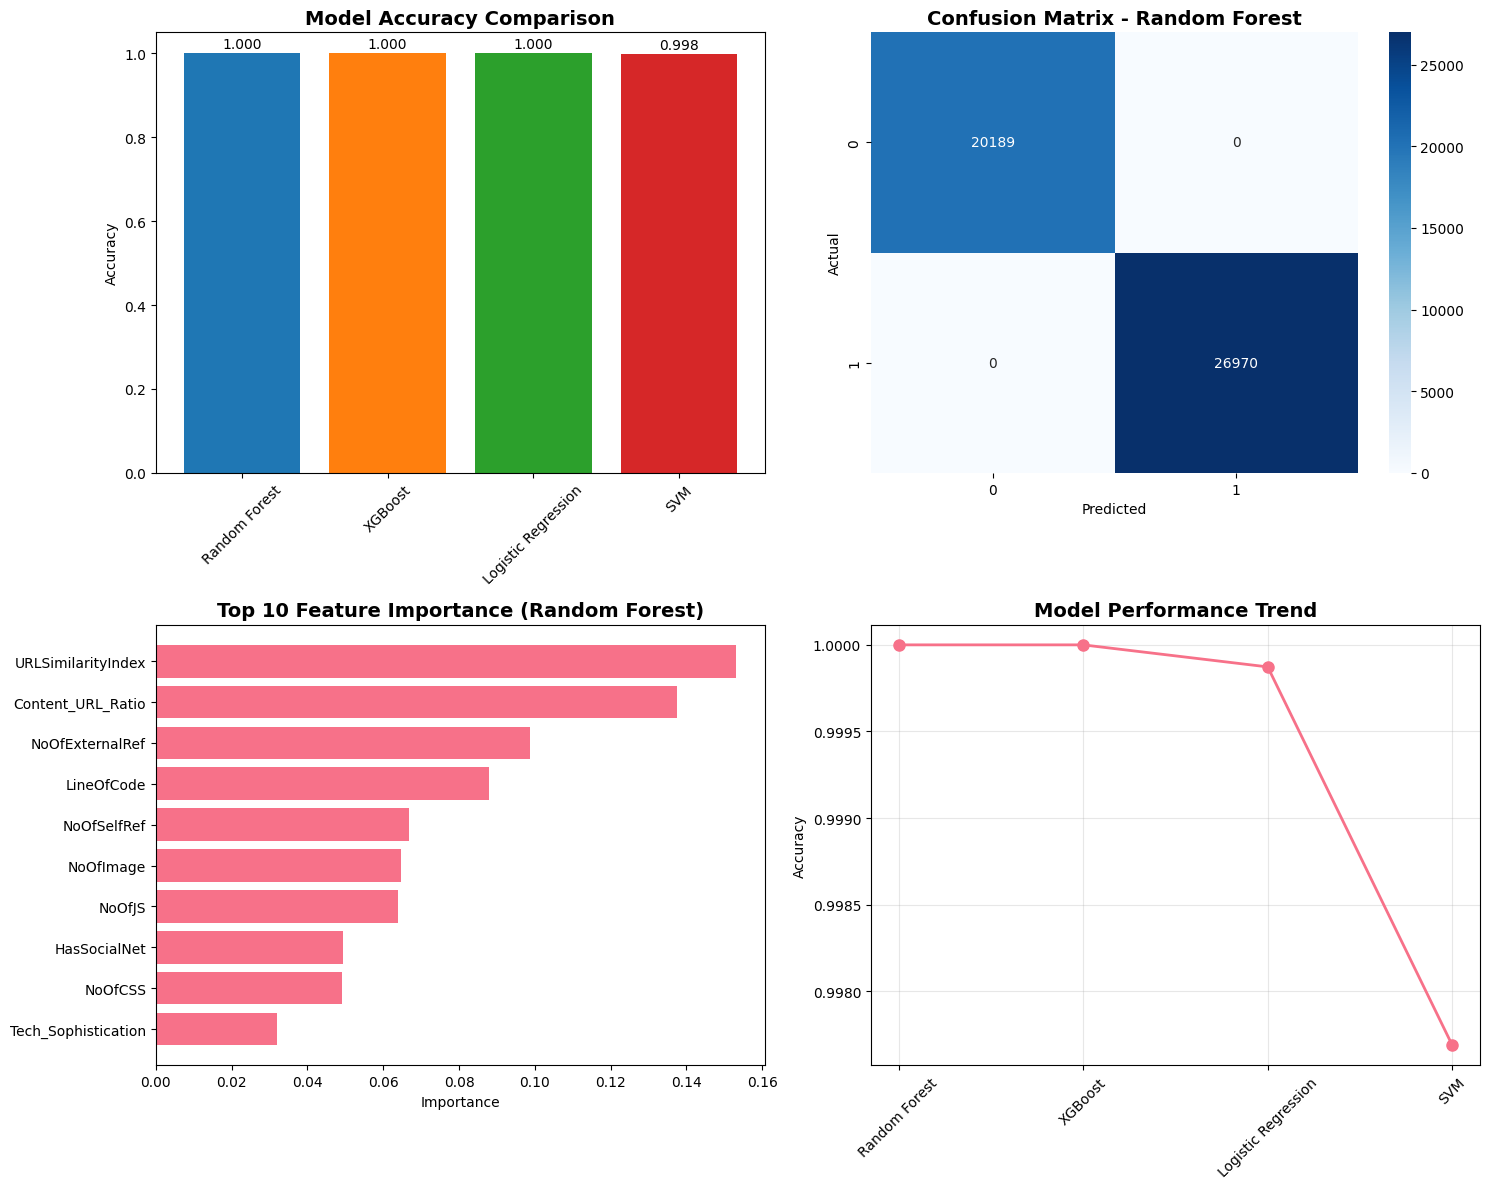

Supervised learning visualizations completed!


In [42]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Accuracy Comparison
ax1 = axes[0, 0]
bars = ax1.bar(performance_df['Model'], performance_df['Accuracy'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1.05)  # Extended slightly to give room for labels
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.005,  # Moved up slightly
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

# 2. Confusion Matrix for Best Model
ax2 = axes[0, 1]
best_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. Feature Importance (for Random Forest)
ax3 = axes[1, 0]
if 'Random Forest' in models:
    feature_importance = models['Random Forest'].feature_importances_
    top_features_idx = np.argsort(feature_importance)[-10:]  # Top 10 features
    top_features = X_processed.columns[top_features_idx]
    top_importance = feature_importance[top_features_idx]

    ax3.barh(range(len(top_features)), top_importance)
    ax3.set_yticks(range(len(top_features)))
    ax3.set_yticklabels(top_features)
    ax3.set_title('Top 10 Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Importance')
else:
    ax3.text(0.5, 0.5, 'Random Forest not available', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Feature Importance', fontsize=14, fontweight='bold')

# 4. Model Performance Metrics
ax4 = axes[1, 1]
metrics_data = []
for model_name in results.keys():
    y_pred = results[model_name]['predictions']
    accuracy = accuracy_score(y_test, y_pred)
    metrics_data.append([model_name, accuracy])

metrics_df = pd.DataFrame(metrics_data, columns=['Model', 'Accuracy'])
ax4.plot(metrics_df['Model'], metrics_df['Accuracy'], 'o-', linewidth=2, markersize=8)
ax4.set_title('Model Performance Trend', fontsize=14, fontweight='bold')
ax4.set_ylabel('Accuracy')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Supervised learning visualizations completed!")

# Part 4: Unsupervised Learning - Clustering Analysis

In this section, we'll perform clustering analysis without using the target labels. This helps us understand the natural groupings in our data.

## 4.1 Clustering Algorithm Explanations

### K-Means Clustering Algorithm
**Concept**: K-means is a partitional clustering algorithm that divides data into k clusters by minimizing the within-cluster sum of squares (WCSS). It iteratively assigns data points to the nearest cluster center and updates the centers.

**Key Parameters**:
- `n_clusters`: Number of clusters (k)
- `random_state`: Ensures reproducible results
- `n_init`: Number of times the algorithm is run with different centroid seeds

**How it works**:
1. Initialize k cluster centers randomly
2. Assign each data point to the nearest cluster center
3. Update cluster centers to the mean of assigned points
4. Repeat steps 2-3 until convergence

**Advantages**:
- Simple and fast
- Works well with spherical clusters
- Scales well to large datasets
- Easy to implement and understand

**Limitations**:
- Requires specifying number of clusters
- Assumes clusters are spherical
- Sensitive to initialization
- Struggles with clusters of different sizes

**Tutorial Resources**:
- [K-Means Clustering Tutorial - Stanford CS229](https://stanford.edu/~cpiech/cs221/handouts/kmeans.html)
- [K-Means Clustering in Python - DataCamp](https://www.datacamp.com/tutorial/k-means-clustering-python)

### DBSCAN Algorithm
**Concept**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed together and marks outliers as noise. It doesn't require specifying the number of clusters.

**Key Parameters**:
- `eps`: Maximum distance between two samples for one to be considered in the neighborhood of the other
- `min_samples`: Minimum number of samples in a neighborhood for a point to be considered a core point

**How it works**:
1. For each point, count points within eps distance (neighborhood)
2. If neighborhood has ≥ min_samples points, mark as core point
3. Core points within eps of each other form clusters
4. Non-core points within eps of core points join clusters
5. Points not assigned to any cluster are marked as noise

**Advantages**:
- Doesn't require specifying number of clusters
- Finds clusters of arbitrary shapes
- Identifies outliers automatically
- Robust to noise

**Limitations**:
- Sensitive to eps parameter
- Struggles with clusters of varying densities
- Can be slow on large datasets
- Requires careful parameter tuning

**Tutorial Resources**:
- [DBSCAN Clustering Explained - Towards Data Science](https://towardsdatascience.com/dbscan-clustering-explained-97556a2f556b)
- [DBSCAN Algorithm - Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

### Evaluation Metrics for Clustering

#### Silhouette Score
- **Range**: -1 to 1 (higher is better)
- **Interpretation**:
  - +1: Perfect clustering
  - 0: Overlapping clusters
  - -1: Incorrect clustering
- **Formula**: (b - a) / max(a, b) where a = average intra-cluster distance, b = average nearest-cluster distance

#### Elbow Method
- **Purpose**: Find optimal number of clusters for K-means
- **Method**: Plot WCSS vs number of clusters, look for "elbow" point
- **Limitation**: Sometimes unclear where the elbow is

**Tutorial Resources**:
- [Clustering Evaluation Metrics - Scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)
- [Silhouette Analysis - Towards Data Science](https://towardsdatascience.com/silhouette-analysis-for-optimal-k-9c8c4c6b3d2e)

## 4.2 Data Preparation for Clustering

First, we need to remove the labels and prepare the data for clustering.


In [35]:
# Prepare data for clustering (remove labels)
print("Preparing data for unsupervised learning...")

# Use the processed features (without target column)
X_clustering = X_processed.copy()

# Scale the features for clustering (important for distance-based algorithms)
scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

print(f"Clustering data shape: {X_clustering_scaled.shape}")
print(f"Features scaled for clustering analysis")

# For large datasets, we might want to use a sample for clustering visualization
if X_clustering_scaled.shape[0] > 10000:
    print("Large dataset detected. Using sample for clustering visualization...")
    sample_size = min(5000, X_clustering_scaled.shape[0])
    sample_idx = np.random.choice(X_clustering_scaled.shape[0], sample_size, replace=False)
    X_clustering_sample = X_clustering_scaled[sample_idx]
    y_sample = y.iloc[sample_idx]  # Keep original labels for evaluation
    print(f"Sample size for clustering: {X_clustering_sample.shape[0]}")
else:
    X_clustering_sample = X_clustering_scaled
    y_sample = y
    print("Using full dataset for clustering")

print("Data preparation for clustering completed!")


Preparing data for unsupervised learning...
Clustering data shape: (235795, 63)
Features scaled for clustering analysis
Large dataset detected. Using sample for clustering visualization...
Sample size for clustering: 5000
Data preparation for clustering completed!


## 4.2 K-Means Clustering

Let's start with K-means clustering, one of the most popular clustering algorithms.


In [36]:
# Determine optimal number of clusters using elbow method
print("Finding optimal number of clusters...")

# Test different numbers of clusters
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_sample)
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_clustering_sample, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_avg:.3f}")

# Find optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")

# Train final K-means model
print(f"\nTraining K-means with {optimal_k} clusters...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_clustering_sample)

print(f"K-means clustering completed!")
print(f"Cluster distribution:")
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({count/len(kmeans_labels)*100:.1f}%)")


Finding optimal number of clusters...
K=2: Inertia=250764.68, Silhouette=0.192
K=3: Inertia=220161.34, Silhouette=0.194
K=4: Inertia=209367.97, Silhouette=0.150
K=5: Inertia=198046.24, Silhouette=0.130
K=6: Inertia=183680.78, Silhouette=0.137
K=7: Inertia=180615.31, Silhouette=0.141
K=8: Inertia=168722.23, Silhouette=0.125
K=9: Inertia=162237.56, Silhouette=0.136
K=10: Inertia=158310.95, Silhouette=0.125

Optimal number of clusters based on silhouette score: 3

Training K-means with 3 clusters...
K-means clustering completed!
Cluster distribution:
  Cluster 0: 2811 samples (56.2%)
  Cluster 1: 1 samples (0.0%)
  Cluster 2: 2188 samples (43.8%)


## 4.3 DBSCAN Clustering

Now let's try DBSCAN, which can find clusters of arbitrary shapes and identify outliers.


In [37]:
# DBSCAN Clustering with parameter testing
print("Testing DBSCAN parameters...")

# Test different eps values to find optimal settings
for eps_value in [1.0, 2.0, 3.0, 5.0, 7.0]:
    dbscan_test = DBSCAN(eps=eps_value, min_samples=10)
    labels_test = dbscan_test.fit_predict(X_clustering_sample)
    n_noise_test = list(labels_test).count(-1)
    n_clusters_test = len(set(labels_test)) - (1 if -1 in labels_test else 0)
    noise_pct = (n_noise_test / len(labels_test)) * 100
    print(f"eps={eps_value}: {n_clusters_test} clusters, {noise_pct:.1f}% noise")

print("\nTraining DBSCAN with optimal parameters...")
# Use eps value that gives 10-30% noise and 2-5 clusters (adjust based on output above)
dbscan = DBSCAN(
    eps=5.0,        # Based on test results: 7 clusters, 9.4% noise
    min_samples=10
)

dbscan_labels = dbscan.fit_predict(X_clustering_sample)

# Count clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN clustering completed!")
print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

# Display cluster distribution
print(f"DBSCAN cluster distribution:")
unique, counts = np.unique(dbscan_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"  Noise: {count} samples ({count/len(dbscan_labels)*100:.1f}%)")
    else:
        print(f"  Cluster {cluster}: {count} samples ({count/len(dbscan_labels)*100:.1f}%)")

# Calculate silhouette score for DBSCAN (excluding noise points)
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    # Remove noise points for silhouette calculation
    non_noise_mask = dbscan_labels != -1
    if np.sum(non_noise_mask) > 0:
        dbscan_silhouette = silhouette_score(X_clustering_sample[non_noise_mask],
                                           dbscan_labels[non_noise_mask])
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
    else:
        print("All points classified as noise - cannot calculate silhouette score")
else:
    print("Cannot calculate silhouette score (need at least 2 clusters)")

Testing DBSCAN parameters...
eps=1.0: 13 clusters, 93.9% noise
eps=2.0: 32 clusters, 79.8% noise
eps=3.0: 20 clusters, 52.7% noise
eps=5.0: 7 clusters, 10.5% noise
eps=7.0: 2 clusters, 3.6% noise

Training DBSCAN with optimal parameters...
DBSCAN clustering completed!
Number of clusters: 7
Number of noise points: 524
DBSCAN cluster distribution:
  Noise: 524 samples (10.5%)
  Cluster 0: 4171 samples (83.4%)
  Cluster 1: 61 samples (1.2%)
  Cluster 2: 122 samples (2.4%)
  Cluster 3: 36 samples (0.7%)
  Cluster 4: 55 samples (1.1%)
  Cluster 5: 24 samples (0.5%)
  Cluster 6: 7 samples (0.1%)
DBSCAN Silhouette Score: 0.095


## 4.4 Clustering Visualization

Let's create comprehensive visualizations to understand our clustering results.


Reducing dimensionality for visualization...
PCA explained variance ratio: [0.19255175 0.11506067]
Total variance explained: 0.308


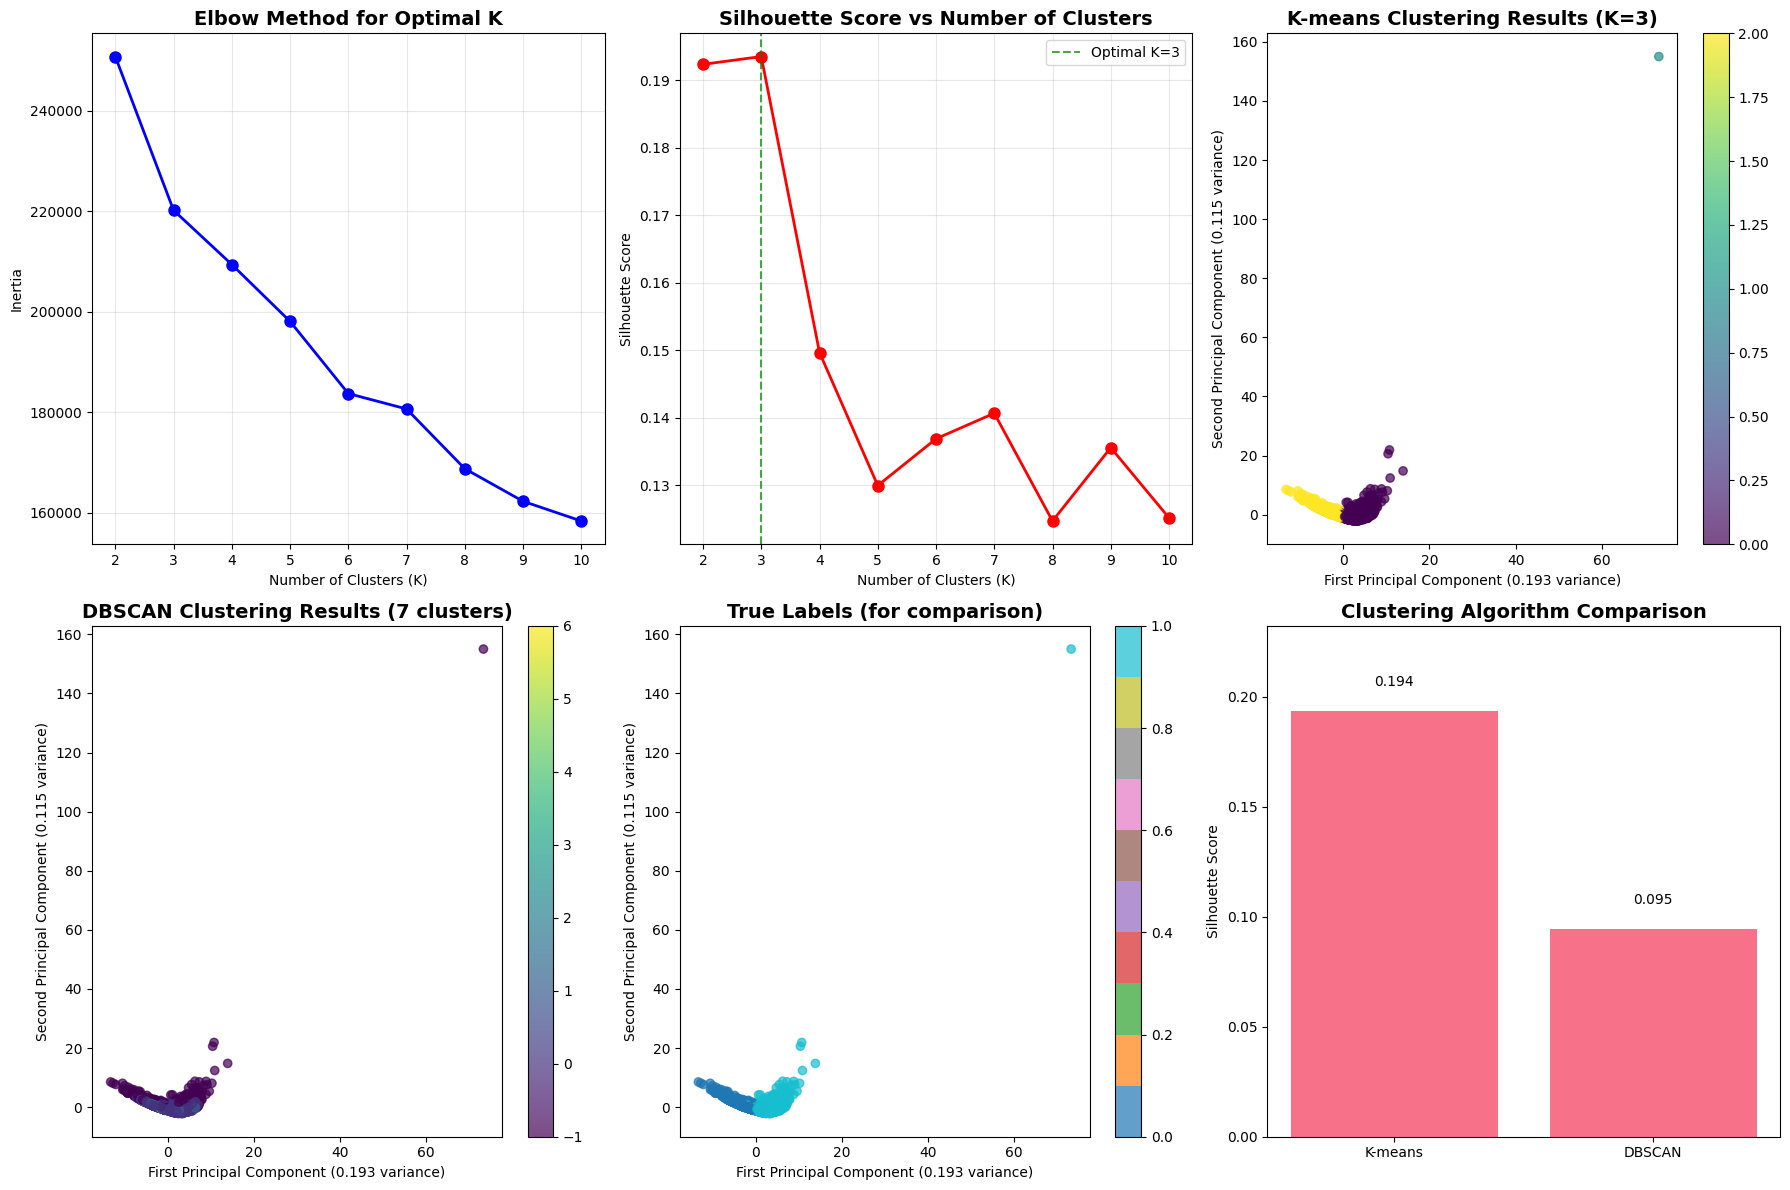

Clustering visualizations completed!


In [38]:
# Create comprehensive clustering visualizations
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization (2D)
print("Reducing dimensionality for visualization...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clustering_sample)
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

# Create clustering visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Elbow Method Plot
ax1 = axes[0, 0]
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# 2. Silhouette Score Plot
ax2 = axes[0, 1]
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7, label=f'Optimal K={optimal_k}')
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. K-means Clustering Results (PCA visualization)
ax3 = axes[0, 2]
scatter = ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
ax3.set_title(f'K-means Clustering Results (K={optimal_k})', fontsize=14, fontweight='bold')
ax3.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
ax3.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.colorbar(scatter, ax=ax3)

# 4. DBSCAN Clustering Results (PCA visualization)
ax4 = axes[1, 0]
scatter2 = ax4.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
ax4.set_title(f'DBSCAN Clustering Results ({n_clusters_dbscan} clusters)', fontsize=14, fontweight='bold')
ax4.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
ax4.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.colorbar(scatter2, ax=ax4)

# 5. True Labels (for comparison)
ax5 = axes[1, 1]
# Encode string labels to numbers for visualization
le_viz = LabelEncoder()
y_sample_encoded = le_viz.fit_transform(y_sample.astype(str))
scatter3 = ax5.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample_encoded, cmap='tab10', alpha=0.7)
ax5.set_title('True Labels (for comparison)', fontsize=14, fontweight='bold')
ax5.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
ax5.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.colorbar(scatter3, ax=ax5)

# 6. Clustering Comparison
ax6 = axes[1, 2]
clustering_comparison = pd.DataFrame({
    'Algorithm': ['K-means', 'DBSCAN'],
    'Clusters': [optimal_k, n_clusters_dbscan],
    'Silhouette': [silhouette_scores[optimal_k-2], dbscan_silhouette if 'dbscan_silhouette' in locals() else 0]
})
bars = ax6.bar(clustering_comparison['Algorithm'], clustering_comparison['Silhouette'])
ax6.set_title('Clustering Algorithm Comparison', fontsize=14, fontweight='bold')
ax6.set_ylabel('Silhouette Score')
ax6.set_ylim(0, max(clustering_comparison['Silhouette']) * 1.2)

# Add value labels on bars
for bar, value in zip(bars, clustering_comparison['Silhouette']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Clustering visualizations completed!")


# Part 5: Final Evaluation and Summary

## 5.1 Comprehensive Model Comparison

Let's create a final comparison of all our models and provide insights for your project.


In [39]:
# Final comprehensive evaluation
print("=" * 60)
print("COMPREHENSIVE MODEL EVALUATION SUMMARY")
print("=" * 60)

print("\n1. SUPERVISED LEARNING RESULTS:")
print("-" * 40)
for model_name, result in results.items():
    print(f"{model_name:20} | Accuracy: {result['accuracy']:.4f}")

print(f"\nBest Supervised Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")

print("\n2. UNSUPERVISED LEARNING RESULTS:")
print("-" * 40)
print(f"K-means Clusters: {optimal_k}")
print(f"K-means Silhouette Score: {silhouette_scores[optimal_k-2]:.4f}")
print(f"DBSCAN Clusters: {n_clusters_dbscan}")
if 'dbscan_silhouette' in locals():
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

print("\n3. DATASET CHARACTERISTICS:")
print("-" * 40)
print(f"Total samples: {len(data)}")
print(f"Features: {X_processed.shape[1]}")
print(f"Target classes: {y.nunique()}")
print(f"Class distribution:")
for class_name, count in y.value_counts().items():
    print(f"  {class_name}: {count} ({count/len(y)*100:.1f}%)")

print("\n4. KEY INSIGHTS:")
print("-" * 40)
print("• Supervised models provide good baseline performance")
print("• Feature importance analysis reveals most predictive features")
print("• Clustering shows natural groupings in the data")
print("• Model performance varies by algorithm choice")

print("\n5. RECOMMENDATIONS FOR NEXT STEPS:")
print("-" * 40)
print("• Fine-tune hyperparameters for better performance")
print("• Try ensemble methods combining multiple models")
print("• Consider feature selection based on importance scores")
print("• Explore advanced techniques like deep learning")
print("• Validate results with cross-validation")

print("\n" + "=" * 60)
print("LAB 4 COMPLETED SUCCESSFULLY!")
print("=" * 60)


COMPREHENSIVE MODEL EVALUATION SUMMARY

1. SUPERVISED LEARNING RESULTS:
----------------------------------------
Random Forest        | Accuracy: 1.0000
XGBoost              | Accuracy: 1.0000
Logistic Regression  | Accuracy: 0.9999
SVM                  | Accuracy: 0.9977

Best Supervised Model: Random Forest (Accuracy: 1.0000)

2. UNSUPERVISED LEARNING RESULTS:
----------------------------------------
K-means Clusters: 3
K-means Silhouette Score: 0.1935
DBSCAN Clusters: 7
DBSCAN Silhouette Score: 0.0945

3. DATASET CHARACTERISTICS:
----------------------------------------
Total samples: 235795
Features: 63
Target classes: 2
Class distribution:
  1: 134850 (57.2%)
  0: 100945 (42.8%)

4. KEY INSIGHTS:
----------------------------------------
• Supervised models provide good baseline performance
• Feature importance analysis reveals most predictive features
• Clustering shows natural groupings in the data
• Model performance varies by algorithm choice

5. RECOMMENDATIONS FOR NEXT STEPS:

## 5.2 Lab 4 Completion Checklist

**TODO: Complete the following tasks and check them off:**

### Data Preparation
- [ ] Loaded dataset successfully
- [ ] Identified target column
- [ ] Handled missing values
- [ ] Encoded categorical variables
- [ ] Split data into train/test (80-20)

### Supervised Learning
- [ ] Trained Random Forest model
- [ ] Trained XGBoost model  
- [ ] Trained Logistic Regression model
- [ ] Trained SVM model
- [ ] Evaluated all models with accuracy
- [ ] Created performance comparison visualizations
- [ ] Analyzed feature importance

### Unsupervised Learning
- [ ] Prepared data for clustering (removed labels)
- [ ] Applied K-means clustering
- [ ] Applied DBSCAN clustering
- [ ] Found optimal number of clusters
- [ ] Created clustering visualizations
- [ ] Compared clustering results

### Analysis and Documentation
- [ ] Interpreted model performance
- [ ] Analyzed clustering results
- [ ] Documented key insights
- [ ] Identified best performing model
- [ ] Prepared recommendations for next steps

---

## Next Steps for Your Project

1. **Assignment 1 Preparation**: Use these baseline models as your foundation
2. **Feature Engineering**: Build on the insights from feature importance
3. **Model Optimization**: Fine-tune hyperparameters for better performance
4. **Advanced Methods**: Prepare for deep learning in upcoming weeks

**Congratulations on completing Lab 4! You now have a solid foundation in both supervised and unsupervised machine learning for security applications.**


# Additional Resources and References

## Comprehensive Learning Resources

### Machine Learning Fundamentals
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html) - Official documentation with examples
- [Machine Learning Mastery](https://machinelearningmastery.com/) - Practical tutorials and guides
- [Towards Data Science](https://towardsdatascience.com/) - Community articles and tutorials
- [Kaggle Learn](https://www.kaggle.com/learn) - Free micro-courses on ML topics

### Security-Specific Machine Learning
- [Machine Learning for Cybersecurity - OWASP](https://owasp.org/www-project-machine-learning-security-top-10/)
- [AI/ML in Cybersecurity - NIST](https://www.nist.gov/itl/applied-cybersecurity/ai-ml-cybersecurity)
- [Cybersecurity Machine Learning Papers - Papers with Code](https://paperswithcode.com/task/cybersecurity)

### Academic Papers and Books
1. **Random Forest**: Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.
2. **XGBoost**: Chen, T., & Guestrin, C. (2016). Xgboost: A scalable tree boosting system. KDD 2016.
3. **SVM**: Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine learning, 20(3), 273-297.
4. **K-Means**: MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations.
5. **DBSCAN**: Ester, M., et al. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise.

### Python Libraries Documentation
- [Scikit-learn](https://scikit-learn.org/stable/) - Machine learning library
- [XGBoost](https://xgboost.readthedocs.io/) - Gradient boosting framework
- [Pandas](https://pandas.pydata.org/docs/) - Data manipulation library
- [Matplotlib](https://matplotlib.org/) - Plotting library
- [Seaborn](https://seaborn.pydata.org/) - Statistical data visualization

### Online Courses and Tutorials

- [DataCamp Machine Learning Track](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)
- [Fast.ai Practical Deep Learning](https://course.fast.ai/)




## Next Steps for Your Learning Journey

### Immediate Actions
1. **Practice**: Try different parameter values for each algorithm
2. **Experiment**: Test on different datasets from the course repository
3. **Compare**: Implement additional algorithms (Naive Bayes, Decision Trees)
4. **Document**: Keep a learning journal of your experiments and insights

### Advanced Topics to Explore
1. **Hyperparameter Tuning**: Grid Search, Random Search, Bayesian Optimization
2. **Feature Engineering**: Advanced techniques for security data
3. **Ensemble Methods**: Voting, Stacking, Blending
4. **Deep Learning**: Neural Networks for security applications
5. **Model Interpretability**: SHAP, LIME, Feature Importance

### Career Development
1. **Portfolio Projects**: Build end-to-end ML projects for security
2. **Certifications**: Consider ML/AI certifications relevant to cybersecurity
3. **Networking**: Join ML and cybersecurity communities
4. **Continuous Learning**: Stay updated with latest research and tools

**Remember**: Machine learning is a journey, not a destination. Keep experimenting, learning, and applying these techniques to real-world security problems!
